# Credit data - Enables financial business to make informed decision during providing or extending credit to its customers.

# Business Objective - To analyze Credit data which should enable them to make data driven decision once they have a new customer.

# Project Objective- To prepare a trained classifier model from the data so as to analyze which category the new customer belong to which should ease the financial business to make the most appropriate decission related to that group.

# K-Means Clustering - unsupervised machine learning technique, to prepare a trained classifier model to predict a new customer's likelihood of having good relationship with regards to credit amount taken.

# Why K-Means Clustering- Because this is unlabeled numerical data and this technique will automatically and quickly group them together into appropriate clusters.

# Import all necessary packages

In [39]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
import pandas_profiling

# Read data, missing values, Shape

In [2]:
data=pd.read_excel('Credit.xlsx')
data.head()
data.tail()
data.info()
data.shape
data.describe()
data.isna().sum()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,18.701,5524,415,5,64,7,Female,No,No,Asian,966


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


(400, 11)

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

# To convert objects to integer

In [5]:
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=pd.Categorical(data[col]).codes
data.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,1,0,1,2,333
1,106.025,6645,483,3,82,15,0,1,1,1,903


# Creating Pivot for the Features and Rating

In [6]:
data_pivot=pd.pivot_table(data,values=['Income','Limit','Cards','Age','Education','Gender','Student','Married','Ethnicity','Balance'],index='Rating',aggfunc=np.median)
data_pivot.head()
data_pivot.shape
data[['Income','Limit','Cards','Age','Education','Gender','Student','Married','Ethnicity','Balance','Rating']].nunique()

,Age,Balance,Cards,Education,Ethnicity,Gender,Income,Limit,Married,Student
Rating,,,,,,,,,,
93,38.0,0.0,1.0,16.0,2.0,1.0,15.717,905.0,1.0,1.0
103,36.0,0.0,2.0,11.0,0.0,1.0,15.602,906.0,1.0,0.0
112,70.0,0.0,3.0,14.0,2.0,1.0,13.433,1134.0,1.0,0.0
115,74.0,0.0,2.0,15.0,1.0,1.0,16.819,1337.0,1.0,0.0
117,77.0,0.0,3.0,14.0,0.0,0.0,11.808,1300.0,0.0,0.0


(283, 10)

Income       399
Limit        387
Cards          9
Age           68
Education     16
Gender         2
Student        2
Married        2
Ethnicity      3
Balance      284
Rating       283
dtype: int64

# Scaler function to do scaling of features

In [23]:
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(data_pivot)
data_scld=pd.DataFrame(arr_scld, columns=data_pivot.columns)
data_scld.head()
data_scld.describe()
data_scld.shape
import warnings
warnings.filterwarnings('ignore')

,Age,Balance,Cards,Education,Ethnicity,Gender,Income,Limit,Married,Student
0,0.189189,0.0,0.000000,0.769231,1.0,1.0,0.030374,0.003829,1.0,1.0
1,0.162162,0.0,0.153846,0.384615,0.0,1.0,0.029721,0.003906,1.0,0.0
2,0.621622,0.0,0.307692,0.615385,1.0,1.0,0.017416,0.021366,1.0,0.0
3,0.675676,0.0,0.153846,0.692308,0.5,1.0,0.036625,0.036912,1.0,0.0
4,0.716216,0.0,0.307692,0.615385,0.0,0.0,0.008198,0.034079,0.0,0.0


,Age,Balance,Cards,Education,Ethnicity,Gender,Income,Limit,Married,Student
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.429281,0.273913,0.303887,0.571623,0.632509,0.482332,0.219000,0.312691,0.611307,0.090106
std,0.214215,0.238984,0.193656,0.218265,0.392329,0.481618,0.216900,0.193614,0.466022,0.269306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270270,0.047149,0.153846,0.384615,0.500000,0.000000,0.069237,0.166794,0.000000,0.000000
50%,0.418919,0.248374,0.307692,0.615385,0.750000,0.500000,0.136818,0.300276,1.000000,0.000000
75%,0.608108,0.453227,0.461538,0.769231,1.000000,1.000000,0.293027,0.426099,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(283, 10)

# Creating Heatmap to understand the correlation

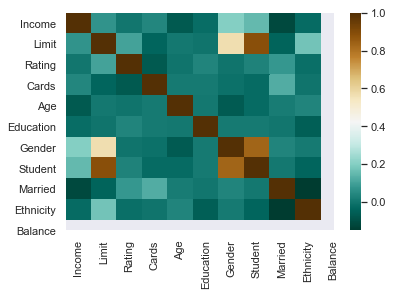

In [24]:
sns.heatmap(data_scld.corr(),
            xticklabels=data.columns,
            yticklabels=data.columns
           ,cmap='BrBG_r')

# Scatter Plot - identified strong correlation between Income, Limit,balance, rating

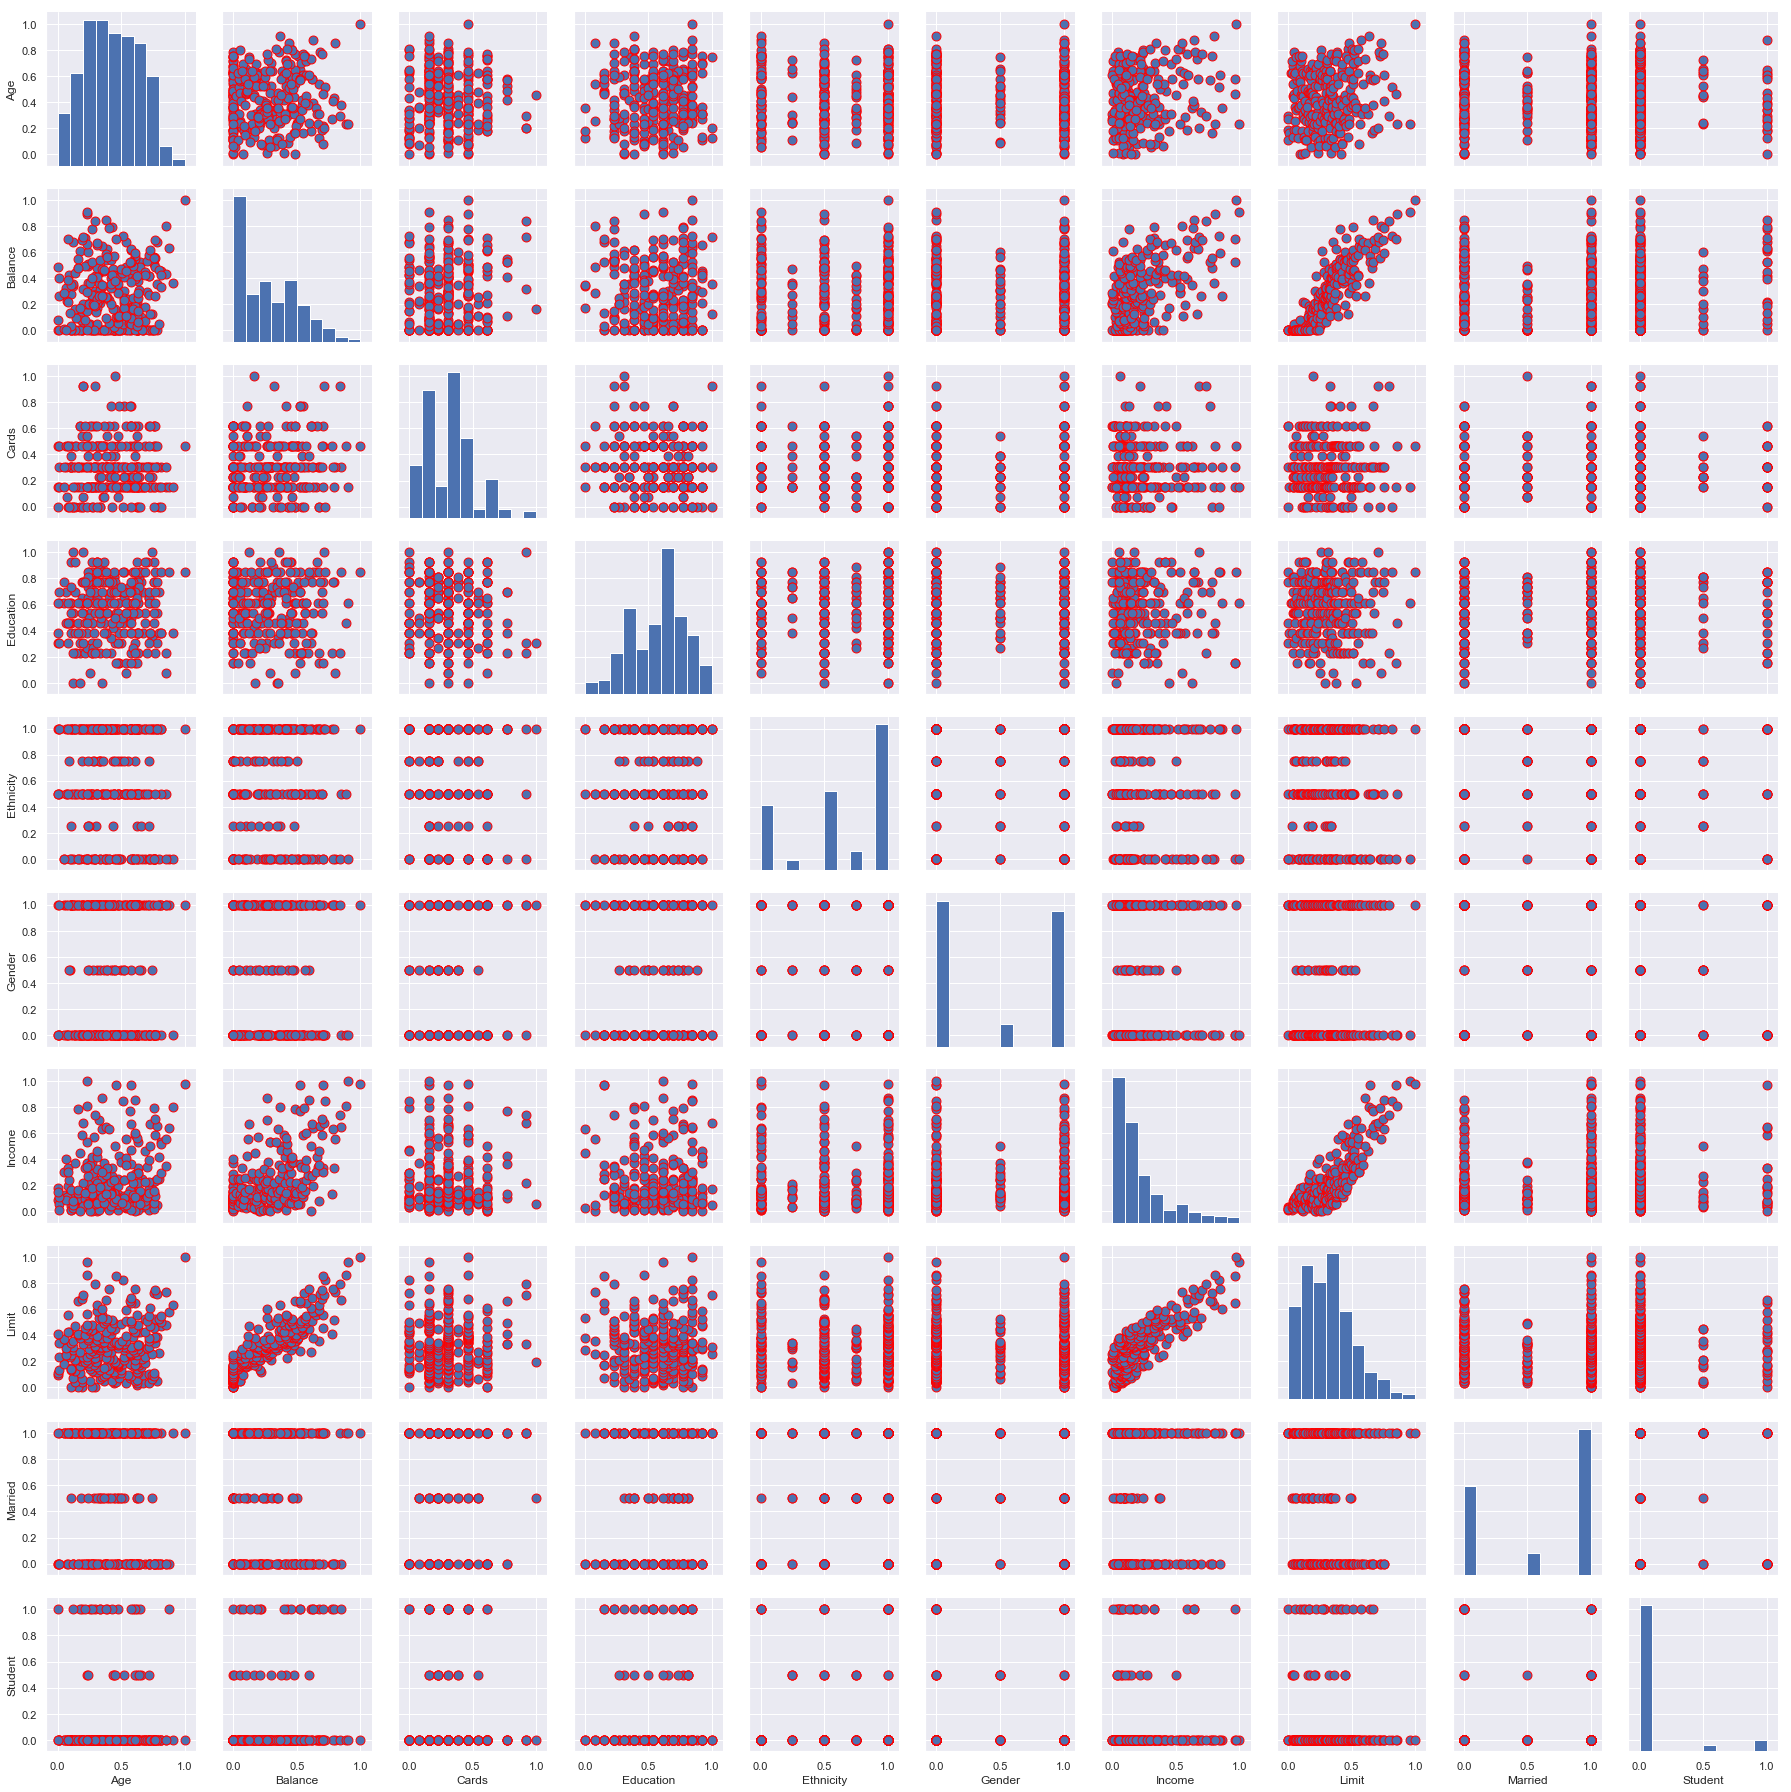

In [26]:
sns.pairplot(data_scld,kind="scatter", plot_kws=dict(s=80, edgecolor="red", linewidth=1))
plt.show()

# Box plot to see the outliers

Text(0.5, 1.0, 'darkgrid')

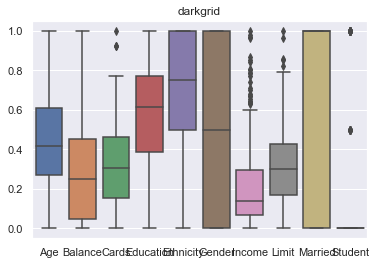

In [29]:
sns.set_style("darkgrid")
sns.boxplot(data=data_scld);
plt.title("darkgrid")

# Display of Q1, Q3 values from Outliers

In [30]:
cols = list(data_scld)
irq_score = {}

for c in cols:
    q1 = data_scld[c].quantile(0.25)
    q3 = data_scld[c].quantile(0.75)
    score = q3 - q1
    outliers = data_scld[(data_scld[c] < q1 - 1.5 * score) | (data_scld[c] > q3 + 1.5 * score)][c]
    values = data_scld[(data_scld[c] >= q1 - 1.5 * score) | (data_scld[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

,Q1,Q3,IRQ,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
Age,0.270270,0.608108,0.337838,0,NaN,NaN,NaN,0.429281,0.214215,0.418919
Balance,0.047149,0.453227,0.406078,0,NaN,NaN,NaN,0.273913,0.238984,0.248374
Cards,0.153846,0.461538,0.307692,4,0.942308,0.038462,0.923077,0.303887,0.193656,0.307692
Education,0.384615,0.769231,0.384615,0,NaN,NaN,NaN,0.571623,0.218265,0.615385
Ethnicity,0.500000,1.000000,0.500000,0,NaN,NaN,NaN,0.632509,0.392329,0.750000
Gender,0.000000,1.000000,1.000000,0,NaN,NaN,NaN,0.482332,0.481618,0.500000
Income,0.069237,0.293027,0.223790,23,0.773683,0.120200,0.770518,0.219000,0.216900,0.136818
Limit,0.166794,0.426099,0.259305,5,0.898652,0.077488,0.858554,0.312691,0.193614,0.300276
Married,0.000000,1.000000,1.000000,0,NaN,NaN,NaN,0.611307,0.466022,1.000000
Student,0.000000,0.000000,0.000000,31,0.822581,0.243187,1.000000,0.090106,0.269306,0.000000


# Display of Scaled data

In [34]:
data_scld.info()
data_scld.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 10 columns):
Age          283 non-null float64
Balance      283 non-null float64
Cards        283 non-null float64
Education    283 non-null float64
Ethnicity    283 non-null float64
Gender       283 non-null float64
Income       283 non-null float64
Limit        283 non-null float64
Married      283 non-null float64
Student      283 non-null float64
dtypes: float64(10)
memory usage: 22.2 KB


,Age,Balance,Cards,Education,Ethnicity,Gender,Income,Limit,Married,Student
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.429281,0.273913,0.303887,0.571623,0.632509,0.482332,0.219000,0.312691,0.611307,0.090106
std,0.214215,0.238984,0.193656,0.218265,0.392329,0.481618,0.216900,0.193614,0.466022,0.269306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270270,0.047149,0.153846,0.384615,0.500000,0.000000,0.069237,0.166794,0.000000,0.000000
50%,0.418919,0.248374,0.307692,0.615385,0.750000,0.500000,0.136818,0.300276,1.000000,0.000000
75%,0.608108,0.453227,0.461538,0.769231,1.000000,1.000000,0.293027,0.426099,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
n_unique = data_scld.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Age           82
Balance      212
Cards         12
Education     22
Ethnicity      5
Gender         3
Income       283
Limit        277
Married        3
Student        3
dtype: int64


# Exploratory data analysis

In [40]:
eda_report=pandas_profiling.ProfileReport(data_scld)
eda_report.to_file("Credit_card_EDA_report.html")

# Principal Component Analysis (PCA).

# This dataset consists of 11 variables correlated with each other (few heavily),PCA is used to reduce this dimensionality.

# fit PCA model.The number of components will be same as number of Variables.

# #first component explains 24% of variance,second 23%,third 16% and so on

In [53]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_scld)
pca
str(pca.explained_variance_ratio_)
str(pca.explained_variance_ratio_.sum())
pca=PCA().fit(data_scld)
np.round(pca.explained_variance_ratio_[0:10]*100,1)
str(pca.explained_variance_ratio_.sum()*100)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

'[0.24562639 0.23342836 0.16327834 0.12699358 0.07449988 0.05216839\n 0.04435832 0.03846952 0.02062291 0.00055431]'

'0.9999999999999999'

array([24.6, 23.3, 16.3, 12.7,  7.4,  5.2,  4.4,  3.8,  2.1,  0.1])

'99.99999999999999'

# Number of components should explain at least 80% of the original data variance
# Plotting relation between compnents and variance(Elbow method)

Text(0.5, 0, 'number of component')

Text(0, 0.5, 'Cummulative explaind Variance')

Text(5, 0.86, 'right number of components')

Text(10.5, 1, 'total number of components')

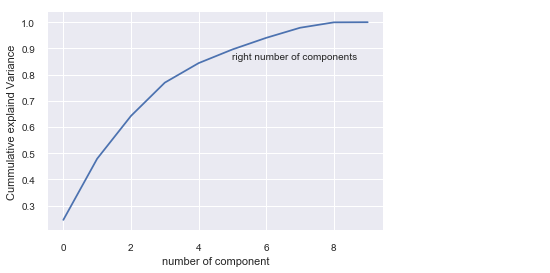

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('Cummulative explaind Variance')
plt.annotate('right number of components',xy=(5,0.86))
plt.annotate('total number of components',xy=(10.5,1))

# from the above graph identified first 5 components has an explaing power of 85%,So passing first 5 components into pca
# Determine the Eigen Values.
# Transformation of original credita data (400X11) in to PCA array (400X5)

In [70]:
pca5=PCA(5).fit(data_scld)
pca5.explained_variance_
np.round(pca5.explained_variance_ratio_[0:10]*100,2)
str(pca5.explained_variance_ratio_.sum()*100)
x_pca=PCA(n_components=5)
data_pca=x_pca.fit_transform(data_scld)
data_pca.shape
data_pca
pca_data=pd.DataFrame(pca5.components_,columns=data_scld.columns)
pca_data

array([0.23291675, 0.22134989, 0.1548297 , 0.12042245, 0.07064497])

array([24.56, 23.34, 16.33, 12.7 ,  7.45])

'84.38265411199211'

(283, 5)

array([[-0.53267061, -0.20425792, -0.44883873, -0.31838791,  1.00354624],
       [-0.56697281, -0.25693976,  0.59862227, -0.53603856,  0.10493582],
       [-0.59573277, -0.2911655 , -0.36520839, -0.37190636, -0.02615766],
       ...,
       [ 0.40924495, -0.41292447,  0.75284367,  0.89516915, -0.18052605],
       [ 0.39499977, -0.45093103,  0.7529028 ,  1.06235394, -0.13012454],
       [-0.60609757, -0.25484352, -0.17102776,  1.33260093, -0.26024094]])

,Age,Balance,Cards,Education,Ethnicity,Gender,Income,Limit,Married,Student
0,0.020615,0.006249,-0.024101,-0.021053,-0.029673,-0.975593,-0.009864,-0.006513,-0.202759,0.067814
1,0.059850,0.035119,-0.033112,-0.068834,-0.040920,0.213289,-0.006223,0.005633,-0.963981,0.113370
2,0.057767,0.036017,0.006083,-0.006732,-0.989704,0.017242,0.084694,0.056795,0.044215,-0.055844
3,0.125371,0.626482,0.045329,-0.017139,0.100533,-0.005399,0.521593,0.538116,0.039525,0.126996
4,-0.152514,0.055547,0.010572,0.049697,-0.073259,0.043061,-0.119430,-0.133159,0.114006,0.958571


# The below Heat map ensures there exists no coorelation between the 5 PCA components
# Dimension reduced from 11 to 5, Correlation between columns adrresed

Text(0.5, 1.0, 'correlation between different features')

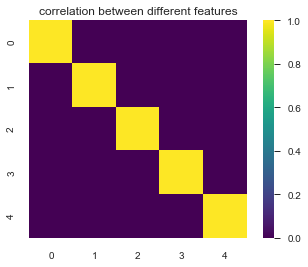

In [60]:
import seaborn as sns
correlation=pd.DataFrame(data_pca).corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='viridis')
plt.title('correlation between different features')

# In PCA-1 Gender is signficant,In PCA-2 Batchelor is significant,In PCA-3 Ethnicity is significant, In PCA-4 Balance is significant followed by Limit,Rating and income and Finally in PCA-5 Student is significant.

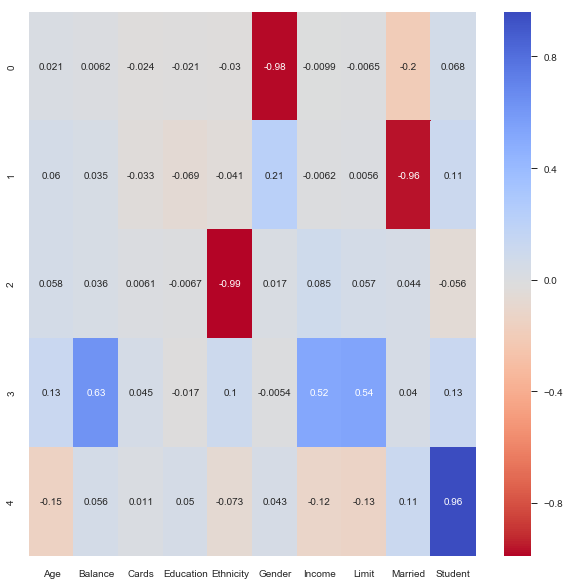

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_data,cmap='coolwarm_r',annot= True)
plt.show();

In [76]:
data_scld_trnsf=pca5.fit_transform(data_scld)
data_clstr=pd.DataFrame(data_scld_trnsf,columns=('P1','P2','P3','p4','p5'))
data_clstr.head()
data_clstr.shape

,P1,P2,P3,p4,p5
0,-0.532671,-0.204258,-0.448839,-0.318388,1.003546
1,-0.566973,-0.256940,0.598622,-0.536039,0.104936
2,-0.595733,-0.291166,-0.365208,-0.371906,-0.026158
3,-0.577984,-0.267703,0.133822,-0.405303,0.000060
4,0.614251,0.506238,0.568444,-0.492673,-0.124984


(283, 5)

# Clustering using K-Means

In [96]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
num_of_clusters= range(2,10)
error = []
 
for num_clusters in num_of_clusters:
    clusters= KMeans(num_clusters)
    clusters.fit(data_clstr)
    error.append(clusters.inertia_/100)
    
df = pd.DataFrame({"Cluster_Number": num_of_clusters,"Error_term":error})
df  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Number,Error_term
0,2,1.646735
1,3,1.292987
2,4,1.066686
3,5,0.946121
4,6,0.854372
5,7,0.764098
6,8,0.694650
7,9,0.628789


# Cluster Prerequisite: Determine the optimum number of clusters required
# Elbow plot curve for number of clusters and SSE

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Find the optimal number of Cluster')

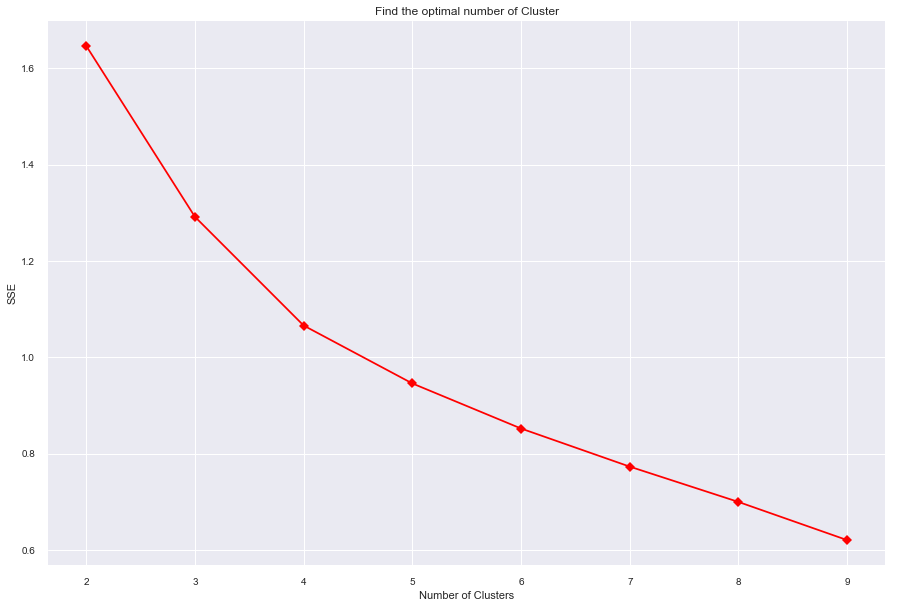

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(data.Cluster,data.Error_Term,marker = "D",color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of Cluster')
plt.show()

# Display of Data based on clusters

In [100]:
clusters = KMeans(4)
clusters.fit(data_clstr)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 2, 1, 0,
       1, 1, 2, 0, 0, 1, 3, 1, 3, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 2,
       1, 1, 1, 3, 1, 1, 2, 2, 0, 3, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 3, 1, 2, 1, 2, 2, 3, 1, 3, 2, 2, 3, 2, 2, 0, 0, 1, 3, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1,
       1, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 0, 0, 0, 1, 3, 3, 3, 1, 1, 0,
       0, 0, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 3, 1,
       1, 1, 0, 0, 3, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 3, 1,
       0, 0, 1, 0, 3, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 2,
       3, 1, 0, 0, 2, 3, 1, 1, 0, 2, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 2, 0,
       1, 0, 0, 1, 2, 3, 0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 1, 1, 3, 1, 1, 1,
       2, 0, 3, 3, 2, 2, 0, 3, 0, 0, 1, 0, 0, 0, 3, 3, 2, 0, 2, 0, 1, 3,
       1, 2, 3, 0, 1, 2, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 1, 1, 0])

In [108]:
dfcredit_pivot=pd.pivot_table(data,index='cluster',aggfunc=np.median)
dfcredit_pivot

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Clusters are formed, when the balance, cards, education, income and limit is Low , Ratings will be low.